# Introduction

For a marketing campaign, the companies are interested in seeing how much of the success could be attributed to the ads. With that in mind, an A/B test is done where the experimental group (the majority of people) will be exposed to ads and a small portion of people (the control group) would instead see a Public Service Announcement (PSA) or nothing in the exact size and place the ad would normally be. 

We analyze the groups and find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant. 

**Data Dictionary**

- **index**: Row Index  
- **User ID**: User ID (unique)  
- **Test group**: If 'ad', the person saw the advertisement; if 'PSA', they only saw the public service announcement.  
- **converted**: If a person bought the product, then True; otherwise, False  
- **total ads**: Amount of ads seen by a person  
- **most ads day**: Day the person saw the most ads  
- **most ads hour**: Hour of the day the person saw the most ads  


## Exploratory Data Analysis

In [4]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the data

df = pd.read_csv('marketing_AB.csv')

#Checking the first five observations

df.head(5)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


- **Categorical Variables:** Test group, converted, most ads day and most ads hour
- **Numerical Variable:** Total Ads

In [11]:
#Checking for duplicate user id as it's the unique identifier

df.duplicated(subset = 'user id').sum()

0

There were no duplicate user ids. It indicates that the ids are all unique. 

In [13]:
#Dropping irrelevant columns - Unnamed: 0 and user id as uder_id alone is not a predictor of anything

df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True)

In [21]:
#Creating a subset of the dataframe df with just the categorical variables

df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]

#Checking the number of unique values in each column 

df_cat.nunique()


test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [24]:
#Extracting the names of the categories in each column

for i in df_cat.columns:
    print (i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


### Univariate Analysis

Text(0.5, 1.0, 'Pie Chart- test group')

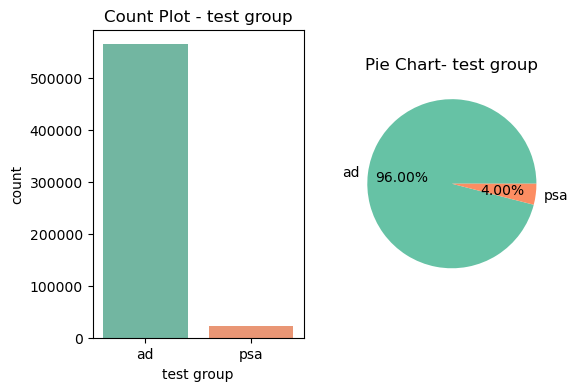

In [ ]:
#Visualizing the variable 'test groups' 

variable = 'test group'

plt.figure(figsize = (6,4))

#Creating a Count plot

plt.subplot(1,2,1)
sns.countplot(x = variable, data = df_cat, palette= 'Set2')
plt.title(f'Count Plot - {variable}')

#Creating a pie chart

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts() #counting the frequency of each unique value in the category
colors = sns.color_palette('Set2', len(counts))
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%', colors=colors)
plt.title(f'Pie Chart- {variable}')


The ads and PSA were visible to 96% and 4% of the visitors respectively.

Text(0.5, 1.0, 'Pie Chart- converted')

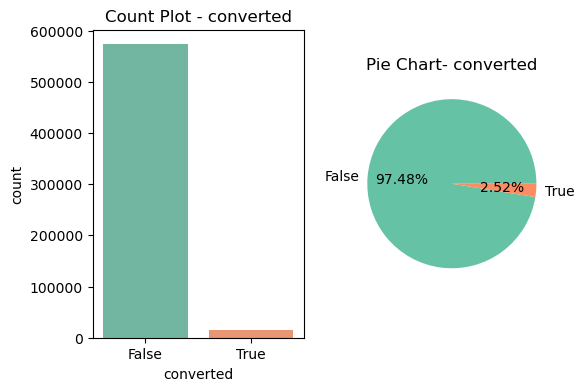

In [37]:
#Visualizing the variable 'test groups' 

variable = 'converted'

plt.figure(figsize = (6,4))

#Creating a Count plot

plt.subplot(1,2,1)
sns.countplot(x = variable, data = df_cat, palette= 'Set2')
plt.title(f'Count Plot - {variable}')

#Creating a pie chart

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts() #counting the frequency of each unique value in the category
colors = sns.color_palette('Set2', len(counts))
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%', colors=colors)
plt.title(f'Pie Chart- {variable}')


This is the objective column for our analysis as it captures the conversions. 2.52% of the visitors bought the product while 97.48% did not. 